##Paso 0: Preparación del entorno virtual

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Clonamos el repositorio de keras-retinanet
!git clone https://github.com/DavidReveloLuna/keras-retinanet.git

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 144, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (120/120), done.
remote: Total 144 (delta 15), reused 144 (delta 15), pack-reused 0
Receiving objects: 100% (144/144), 2.33 MiB | 13.36 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [ ]:
!pip uninstall keras -y
!pip uninstall keras-nightly -y
!pip uninstall keras-Preprocessing -y
!pip uninstall keras-vis -y
!pip uninstall tensorflow -y
!pip uninstall h5py

Found existing installation: keras 2.6.0
Uninstalling keras-2.6.0:
  Successfully uninstalled keras-2.6.0
Found existing installation: Keras-Preprocessing 1.1.2
Uninstalling Keras-Preprocessing-1.1.2:
  Successfully uninstalled Keras-Preprocessing-1.1.2
Found existing installation: keras-vis 0.4.1
Uninstalling keras-vis-0.4.1:
  Successfully uninstalled keras-vis-0.4.1
Found existing installation: tensorflow 2.6.0
Uninstalling tensorflow-2.6.0:
  Successfully uninstalled tensorflow-2.6.0
Found existing installation: h5py 3.1.0
Uninstalling h5py-3.1.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/h5py-3.1.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libaec-9c9e97eb.so.0.0.10
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libhdf5-00e8fae8.so.200.0.0
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libhdf5_hl-383c339f.so.200.0.0
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libsz-e7aa62f5.so.2.0.1
    /usr/local/lib/python3.7/dist-packa

In [ ]:
!pip install tensorflow==2.1.0
!pip install keras==2.3.1
!pip install h5py==2.10.0

     |████████████████████████████████| 421.8 MB 27 kB/s 
     |████████████████████████████████| 448 kB 45.8 MB/s 
     |████████████████████████████████| 50 kB 6.5 MB/s 
     |████████████████████████████████| 3.8 MB 42.1 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 4.1 MB 35.3 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=80af69421a9c32c6f68fb081be63df44306e58f91dd07332aa18363fc19f4fac
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0


In [ ]:
cd keras-retinanet/

/content/keras-retinanet


In [ ]:
# Instalación y configuración de keras-retinet
!pip install .
!python setup.py build_ext --inplace

Processing /content/keras-retinanet
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp37-cp37m-linux_x86_64.whl size=170921 sha256=8613fd7066906b8d6644a72439dcde0a250c35510af805c9896e6112a696549e
  Stored in directory: /root/.cache/pip/wheels/32/29/34/9b33c07f08b1be9e77607c1fc6b08c679489aa7ddaed329652
  Created wheel for keras-resnet: filename=keras_resnet-0.1.0-py2.py3-none-any.whl size=13344 sha256=c8929e75f8e755a301badd5c4c1261d6bb2c2bfb5362d8a6816383f4dc24be86
  Stored in directory: /root/.cache/pip/wheels/a6/20/57/d7b7be8556e2ebf36345b3df4068a9a13bb90e4a2cc85a6994
Successf

##Paso 1: Importamos las librerías necesarias

In [ ]:
# Librerias
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
import urllib
import os
import csv
import cv2
import time
from PIL import Image

from tensorflow.keras.models import load_model
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

In [ ]:
cd ..

/


##Paso 2: Cargamos el modelo ya entrenado, con 200 pasos en 10 épocas

In [ ]:
# Con el modelo ya entrenado vamos a realizar predicciones
# Cargamos el modelo entrenado, y lo configuramos para que sea compatible con retinanet
#model_path = os.path.join('snapshots', sorted(os.listdir('snapshots'), reverse=True)[0])
model_path = "/content/drive/MyDrive/Proyecto Detección de Mascotas/snapshots/resnet50_csv_10.h5"
print(model_path)

model = models.load_model(model_path, backbone_name='resnet50')
model = models.convert_model(model)

/content/drive/MyDrive/Proyecto Detección de Mascotas/snapshots/resnet50_csv_10.h5


Using TensorFlow backend.


tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-22.627417, -11.313708,  22.627417,  11.313708],
       [-28.50876 , -14.25438 ,  28.50876 ,  14.25438 ],
       [-35.918785, -17.959393,  35.918785,  17.959393],
       [-16.      , -16.      ,  16.      ,  16.      ],
       [-20.158737, -20.158737,  20.158737,  20.158737],
       [-25.398417, -25.398417,  25.398417,  25.398417],
       [-11.313708, -22.627417,  11.313708,  22.627417],
       [-14.25438 , -28.50876 ,  14.25438 ,  28.50876 ],
       [-17.959393, -35.918785,  17.959393,  35.918785]], dtype=float32)> anchors
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-45.254833, -22.627417,  45.254833,  22.627417],
       [-57.01752 , -28.50876 ,  57.01752 ,  28.50876 ],
       [-71.83757 , -35.918785,  71.83757 ,  35.918785],
       [-32.      , -32.      ,  32.      ,  32.      ],
       [-40.317474, -40.317474,  40.317474,  40.317474],
       [-50.796833, -50.796833,  50.7

In [ ]:
# Cargamos el archivo que contiene las etiquetas de las clases /content/drive/MyDrive/Proyecto Detección de Mascotas/classes.csv
#labels_to_names = pd.read_csv('classes.csv', header=None).T.loc[0].to_dict()
labels_to_names = pd.read_csv('/content/drive/MyDrive/Proyecto Detección de Mascotas/classes.csv', header=None).T.loc[0].to_dict()

## Paso 4: Ejecuciones de prueba con imágenes

In [ ]:
# Obtenemos la predicción del modelo: boxes, scores, labels
import skimage.io as io
def predict(image):
  image = preprocess_image(image.copy())
  image, scale = resize_image(image)
  boxes, scores, labels = model.predict_on_batch(
    np.expand_dims(image, axis=0)
  )
  boxes /= scale
  return boxes, scores, labels

In [ ]:
# Mostramos los objetos encontrardos en la imagen
# Se toman encuenta sólo los objetos que tienen asociada una probabilidad mayor a umbralScore
umbralScore = 0.8

def draw_detections(image, boxes, scores, labels):
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
    if score < umbralScore:
        break

    color = label_color(label)

    b = box.astype(int)
    draw_box(image, b, color=color)

    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(image, b, caption)

[  73    0  790 1480]


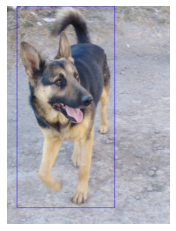

In [ ]:
#En la variable Ruta insertaremos la imagen a procesar (imagen tomada del drive)
Ruta="/content/drive/MyDrive/Proyecto Detección de Mascotas/img_pruebas/Comi.jpg"
image = io.imread(Ruta)
boxes, scores, labels = predict(image)
b = boxes[0].astype(int)
print(b[0])
draw = image.copy()
draw_detections(draw, boxes, scores, labels)
plt.axis('off')
plt.imshow(draw)
plt.show()

### Comparación de imágenes

In [ ]:
from skimage.metrics import structural_similarity
import cv2

#Módulo para comparar dos imágenes
def Orb_Sim(Img1,Img2):
    Orb=cv2.ORB_create()
    #Puntos y descriptores
    Puntos1,Descrip1=Orb.detectAndCompute(Img1,None)
    Puntos2,Descrip2=Orb.detectAndCompute(Img2,None)
    #Definimos el matcher
    BF=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
    #Realizamos el match    
    Matches=BF.match(Descrip1,Descrip2)
    #Buscamos las regiones similares
    RegionesSimilares=[I for I in Matches if I.distance<70]
    if(len(Matches)==0):
        return(0)
    return(len(RegionesSimilares)/len(Matches))
#Módulo para igualar las dimensiones de las imágenes
def Dimensiones(Img1,Img2):
    Sim,Dif=structural_similarity(Img1,Img2,full=True)
    return Sim
    #Fila inicial:final hasta columna inicial:final
def Recortar(Fi,Ff,Ci,Cf,Img):
    #Todos deben ser enteros
    ImgRecorte=Img[Fi:Ff,Ci:Cf]
    return(ImgRecorte)
def Comparar(Img1,Img2):
    Similitud=Orb_Sim(Img1,Img2)
    Porcentaje=round((Similitud*100),2)
    print(Porcentaje)
    if(Porcentaje>90):
        return(True)
    else:
        return(False)       

###Prueba de comparación de imágnes

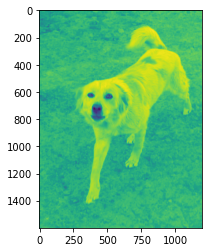

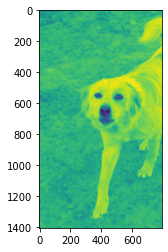

100.0
True


In [ ]:
Imagen1=cv2.imread(Ruta,0)
#[  73    0  790 1480]
Recorte=Recortar(73,1480,0,790,Imagen1)
#Imagen2=cv2.imread("Perro7.jpg",0)
plt.imshow(Imagen1)
plt.show()
plt.imshow(Recorte)
plt.show()
print(Comparar(Imagen1,Recorte))